Replication of the paper Image is Worth 16x16 Words: Transformers for Image Recognition at Scale in pytorhc

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch as nn
from PIL import Image
from torchvision import transforms , datasets
from torch.utils.data import DataLoader

In [2]:
torch.__version__

'2.2.1+cu121'

In [3]:
torchvision.__version__

'0.17.1+cu121'

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Dataset Prep

In [7]:
train_dir = "../datasets/pizza_steak_sushi/train"
test_dir = "../datasets/pizza_steak_sushi/test"

image_size (512, 384)


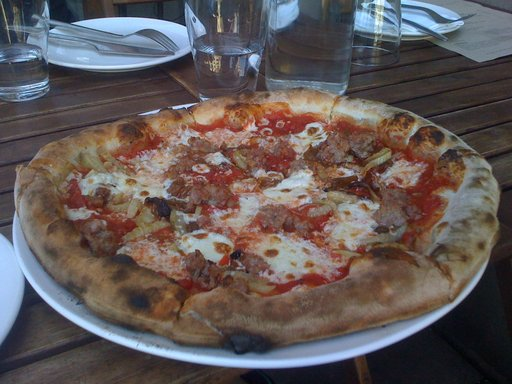

In [27]:
image = Image.open("../datasets/pizza_steak_sushi/train/pizza/5764.jpg")
print("image_size" , image.size)
image

In [28]:
img_size = 224

transform = transforms.Compose([
    transforms.Resize((img_size , img_size)) , 
    transforms.ToTensor(),
])

In [31]:
batch_size = 32

#create datasets
train_data = datasets.ImageFolder(
    "../datasets/pizza_steak_sushi/train" , 
    transform = transform
)

test_data = datasets.ImageFolder(
    "../datasets/pizza_steak_sushi/test" , 
    transform = transform
)

In [36]:
train_dataloader = DataLoader(
    dataset = train_data , 
    batch_size = batch_size , 
    shuffle = True , 
    num_workers = 4 , 
    pin_memory= True
)

test_dataloader = DataLoader(
    dataset = test_data , 
    batch_size = batch_size , 
    shuffle = False , 
    num_workers = 4 , 
    pin_memory = True
)

train_dataloader , test_dataloader , train_data.classes

(<torch.utils.data.dataloader.DataLoader at 0x7f5402afbc40>,
 ['pizza', 'steak', 'sushi'])

In [38]:
# batch of images
image_batch , label_batch = next(iter(train_dataloader))
print("image_batch" , image_batch.shape)
print("label_batch" , label_batch.shape)
# get single image from batch
image , label = image_batch[0] , label_batch[0]

image.shape , label

image_batch torch.Size([32, 3, 224, 224])
label_batch torch.Size([32])


(torch.Size([3, 224, 224]), tensor(2))

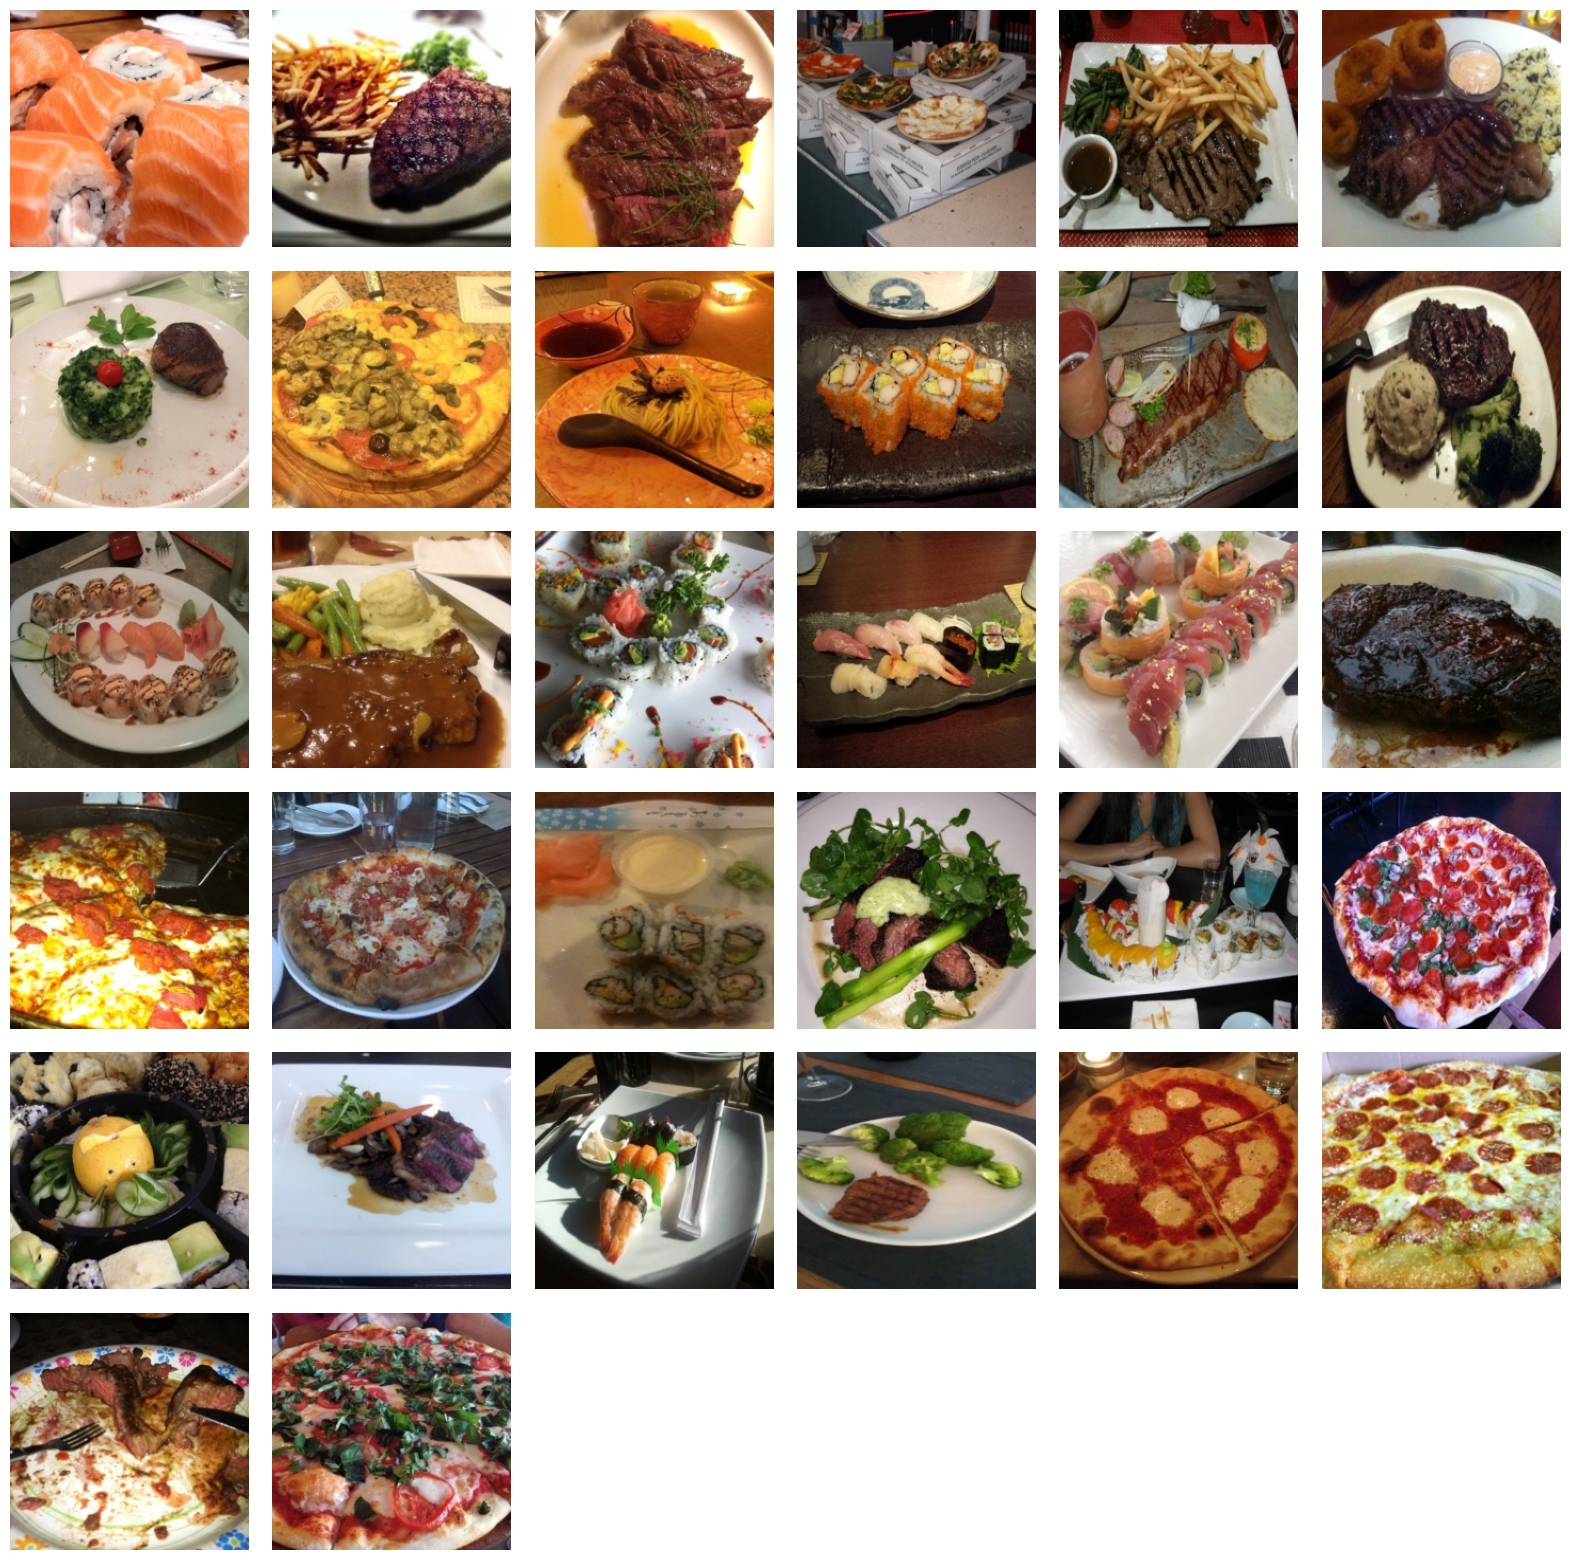

In [63]:
img = []
for image in image_batch:
    image = image.permute(1 , 2 , 0)
    img.append(image)
    
grid_size = int(np.ceil(np.sqrt(batch_size))) 
#np.ceil --> rounding
fig, axs = plt.subplots(grid_size , grid_size , figsize=(20, 20))

for i in range(grid_size):
    for j in range(grid_size):
        ax = axs[i , j ]
        if i * grid_size +j <batch_size:
            ax.imshow(img[i * grid_size+ j], cmap='gray' , aspect='auto')
            ax.axis('off')
        else:
            ax.axis('off')
plt.subplots_adjust(wspace = 0.1  , hspace= 0.1)
plt.show()